In [64]:
from sympy import *
from math import *
import sys


from lib_rungekutta import *

# Phương pháp Runge - Kutta hiện giải bài toán Cauchy cho hệ phương trình vi phân

## 0. Bài toán

Giải hệ phương trình vi phân $r$ phương trình sau:

$$\begin{cases} \frac{dy_{1}}{dx} = f_{1}(x, y_{1}, y_{2}, ...., y_{r})\\\frac{dy_{2}}{dx} = f_{2}(x, y_{1}, y_{2}, ...., y_{r})\\.... \\\frac{dy_{r}}{dx} = f_{r}(x, y_{1}, y_{2}, ...., y_{r})\end{cases}$$

Ta có thể xây dựng lại như sau:

$$\frac{dY}{dx} = F(x, Y)$$

## 1. Nhập dữ liệu

Nhập hệ phương trình $\frac{dY}{dx} = F(x, Y)$, với $x$ thuộc giá trị thực, $Y$ là vector các nghiệm ${y_{i}}$

In [65]:
def expr(x, y):
#{
    dy = np.zeros((len(y)))

    n = y[0]
    p = y[1]
    K = 100
    r = 0.6
    a = 0.04
    muy = 1.2

    dy[0] = r * n * (1 - n / K) - a * n * p
    dy[1] = -muy * p + a * n * p
    return dy
#}

Nhập giá trị ban đầu $x_{0}$ và $Y(x_{0})$

In [66]:
x_0 = 0
y_0 = [70, 20]

Nhập khoảng cách giữa 2 điểm liên tiếp $h = x_{i} - x_{i-1}$

In [74]:
h = 0.1

Nhập số mốc của lưới điểm $n$ 

In [75]:
n = 1000

## 2. Giải PTVP và in ra kết quả
Cấp chính xác:

In [76]:
precision_x   = 3;
precision_y   = 7;
precision_eps = 12;

Giải và in kết quả. Kết quả trả về là dạng `list`, mỗi phần tử có cấu trúc sau:
$$ [x_{i}, Y_{i} = [y_{1}(x_{i}), y_{2}(x_{i}), ..., y_{r}(x_{i})]] $$
với $y_{k}(x_{i})$ là giá trị hàm số $y_{k}$ tại điểm $x_{i}$


In [77]:
uu      = rungekutta_multivariate_oop(expr, x_0, y_0, h, n);
ketqua  = (uu.Solve());

In [78]:
print(f"Phương pháp Runge-Kutta {4} nấc với hoàn tất với lưới điểm sau, sai số toàn cục O(h^{4}) = {round(h**4, precision_eps)}:");
#}
for x in ketqua: print(round(x[0], precision_x), x[1]);

Phương pháp Runge-Kutta 4 nấc với hoàn tất với lưới điểm sau, sai số toàn cục O(h^4) = 0.0001:
0 [70, 20]
0.1 [65.45419904 23.26085432]
0.2 [60.57577771 26.54710746]
0.3 [55.50647681 29.69928911]
0.4 [50.40526672 32.55498991]
0.5 [45.42834081 34.97146347]
0.6 [40.71047032 36.84443907]
0.7 [36.35229956 38.11842319]
0.8 [32.41562031 38.78706227]
0.9 [28.92583373 38.88543349]
1.0 [25.87903359 38.47792686]
1.1 [23.25082266 37.64538475]
1.2 [21.00466544 36.4740364 ]
1.3 [19.0985963  35.04738073]
1.4 [17.48995682 33.44109925]
1.5 [16.13835261 31.72049037]
1.6 [15.00723476 29.93972156]
1.7 [14.06453181 28.1422387 ]
1.8 [13.28268879 26.36181362]
1.9 [12.63837452 24.62386834]
2.0 [12.11203203 22.94684815]
2.1 [11.68737978 21.34351414]
2.2 [11.3509247  19.82209245]
2.3 [11.09151774 18.38725821]
2.4 [10.89996423 17.04095625]
2.5 [10.76869089 15.78307202]
2.6 [10.69146598 14.61197208]
2.7 [10.6631666  13.52493367]
2.8 [10.67958646 12.5184825 ]
2.9 [10.73727774 11.5886555 ]
3.0 [10.8334211 10.73120

## 3. Đồ thị
### 3.1. Đồ thị liên hệ giữa các biến $y_{i}$ và $x$

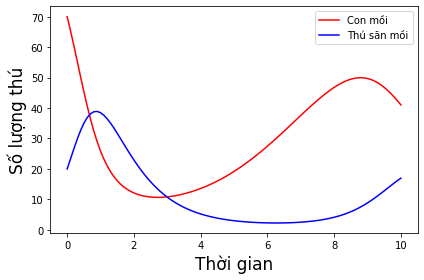

In [79]:
y1  = [];
y2  = [];
y3  = [];
y4  = [];
x   = [];

for xx in ketqua: x.append(xx[0]);
for xx in ketqua: y1.append(xx[1][0]), y2.append(xx[1][1]);

plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')
plt.legend(["Con mồi", "Thú săn mồi"], loc=1)

plt.xlabel('Thời gian', fontsize=17)
plt.ylabel('Số lượng thú', fontsize=17)
plt.tight_layout()
plt.show()

### 3.2.Đồ thị liên hệ giữa các $y_{i}$:

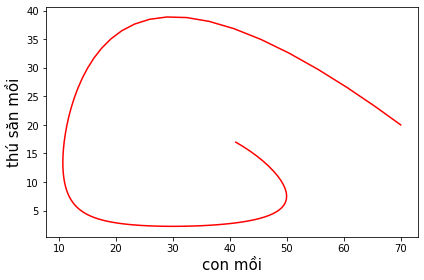

In [80]:
y1  = [];
y2  = [];
y3  = [];
y4  = [];
x   = [];

for xx in ketqua: x.append(xx[0]);
for xx in ketqua: y1.append(xx[1][0]), y2.append(xx[1][1]);
plt.xlabel('con mồi', fontsize=15)
plt.ylabel('thú săn mồi', fontsize=15)

plt.plot(y1, y2, 'r')
plt.tight_layout()
plt.show()